In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('results.csv', index_col=0)

In [3]:
rosen = df[[c for c in df.columns if 'rosen' in c]]
rosen.columns = [x.split('_')[-1] for x in rosen.columns]

rastrigin = df[[c for c in df.columns if 'rastrigin' in c]]
rastrigin.columns = [x.split('_')[-1] for x in rastrigin.columns]

ackley = df[[c for c in df.columns if 'ackley' in c]]
ackley.columns = [x.split('_')[-1] for x in ackley.columns]

In [4]:
data = {
    'rosen' : rosen,
    'rastrigin': rastrigin,
    'ackley': ackley
}

### Results

In [5]:
for f, d in data.items():
    print(f'Mean Results for the {f} function')
    print(d.mean().to_string(), end='\n\n')

Mean Results for the rosen function
rs    0.210771
es    0.938967
ns    0.222894
qd    0.094437

Mean Results for the rastrigin function
rs    1.422907
es    9.929678
ns    1.649280
qd    1.360958

Mean Results for the ackley function
rs    0.739416
es    6.367846
ns    1.131188
qd    0.082692



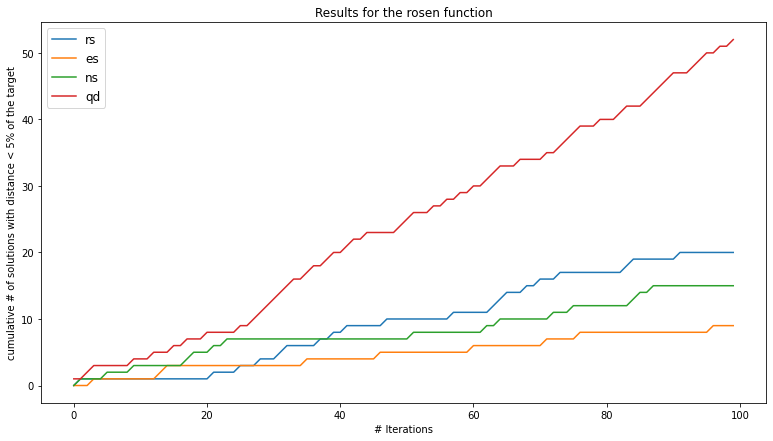

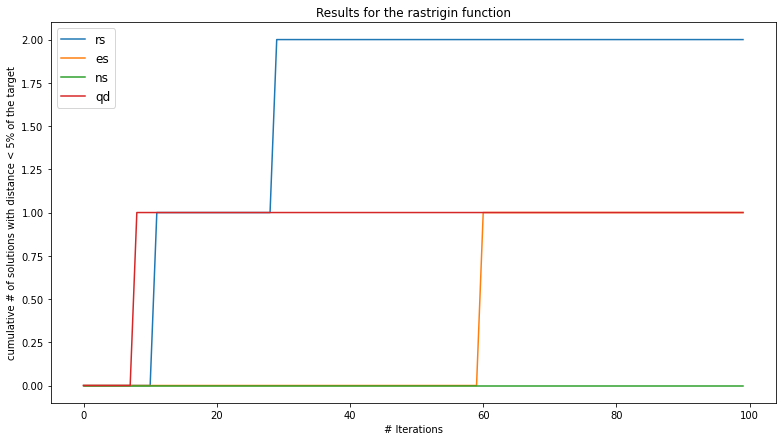

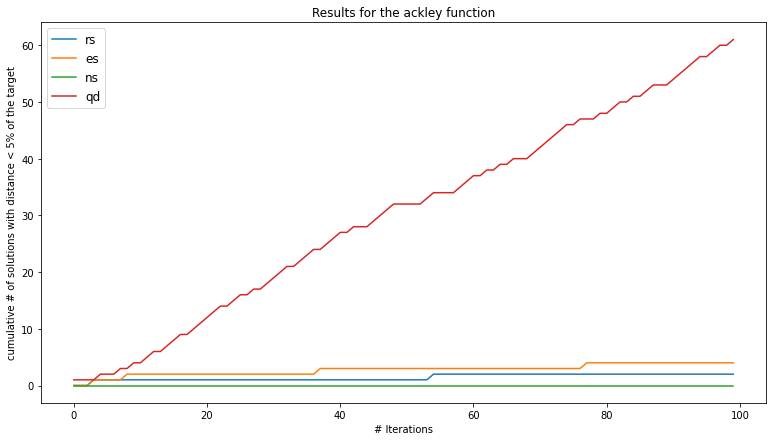

In [8]:
for f, d in data.items():
    bin_d = (d < 0.05).cumsum()
    fig = plt.figure(figsize=(13, 7))
    plt.plot(bin_d, label=bin_d.columns)
    plt.xlabel('# Iterations')
    plt.ylabel('cumulative # of solutions with distance < 5% of the target')
    plt.legend(fontsize='large')
    plt.title(f'Results for the {f} function')

### Plotting the results

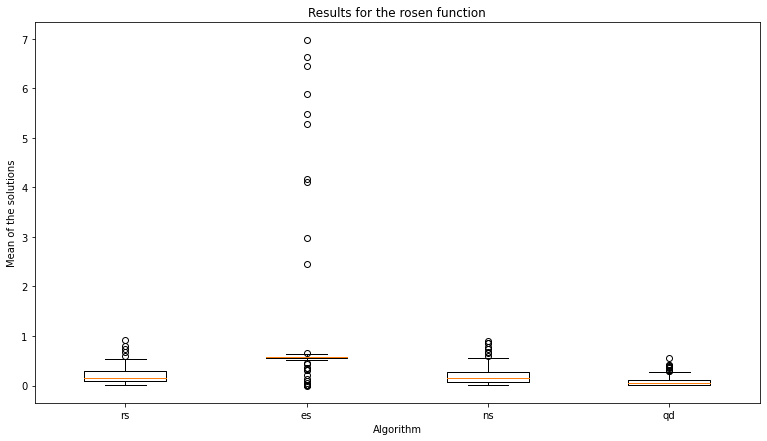

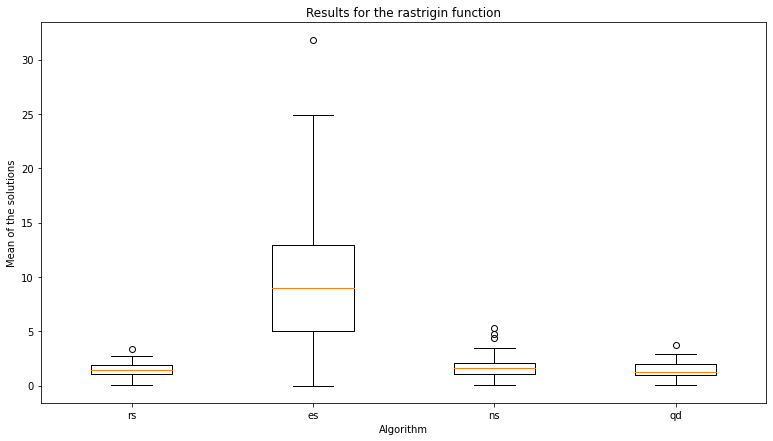

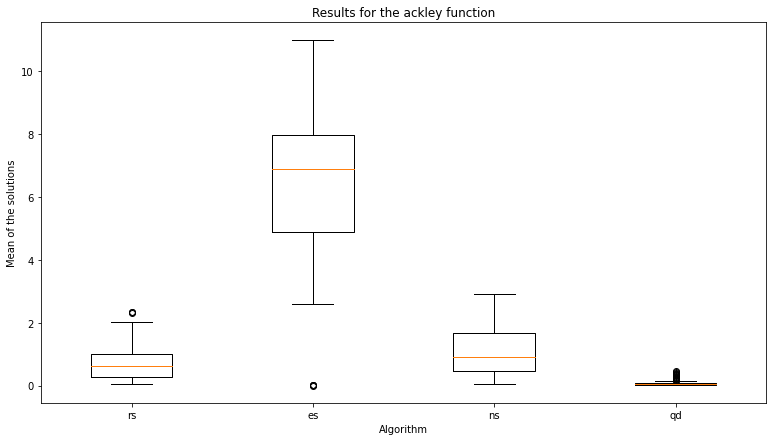

In [11]:
for f, d in data.items():
    fig = plt.figure(figsize=(13, 7))
    _ = plt.boxplot(d, labels=d.columns)
    plt.xlabel('Algorithm')
    plt.ylabel('Mean of the solutions')
    plt.title(f'Results for the {f} function')